# Performance Analysis 

## Overview
The purpose of this project is to take data from a large Portuguese school system, and create machine learning models to predict studnet's performance based on select features. The goal is to use these data to help predict student's learning outcomes, and help identify students who might need additional assistance and interventions.

## Set up the Data
This section imports and inspects the dataset to ensure it is correctly loaded and understand its structure. Then we identify the target attribute the machine learning models will predict, and split the dataset into training and test sets.

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# import the source data
student_mat = pd.read_csv('data/student-mat.csv')

# inital data check - preview records, describe statistics, look at data types
student_mat.head()
student_mat.describe()
student_mat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   school       395 non-null    object 
 1   sex          395 non-null    object 
 2   age          383 non-null    float64
 3   address      395 non-null    object 
 4   famsize      395 non-null    object 
 5   Pstatus      395 non-null    object 
 6   Medu         395 non-null    int64  
 7   Fedu         395 non-null    int64  
 8   Mjob         395 non-null    object 
 9   Fjob         395 non-null    object 
 10  reason       395 non-null    object 
 11  guardian     395 non-null    object 
 12  traveltime   395 non-null    int64  
 13  studytime    395 non-null    int64  
 14  failures     395 non-null    int64  
 15  schoolsup    395 non-null    object 
 16  famsup       395 non-null    object 
 17  paid         395 non-null    object 
 18  activities   395 non-null    object 
 19  nursery 

In [36]:
# identify the target - what we will be predicting
# isolates the target column and drops the data set
y = student_mat['G3']
y.head()

X = student_mat.drop(columns=['G3'])
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences_G1,absences_G2,absences_G3,G1,G2
0,GP,F,18.0,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,1.0,0.0,4.0,5,6
1,GP,F,17.0,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,NaN,0.0,1.0,5,5
2,GP,F,15.0,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,1.0,2.0,8.0,7,8
3,GP,F,15.0,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0.0,1.0,2.0,15,14
4,GP,F,NaN,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0.0,0.0,4.0,6,10


In [37]:

# split the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# preview the data
print(f"X_train: {X_train[:10]}")

X_train:     school sex   age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
181     GP   M  16.0       U     GT3       T     3     3  services     other   
194     GP   M  16.0       U     GT3       T     2     3     other     other   
173     GP   F  16.0       U     GT3       T     1     3   at_home  services   
63      GP   F  16.0       U     GT3       T     4     3   teacher    health   
253     GP   M  16.0       R     GT3       T     2     1     other     other   
225     GP   F  18.0       R     GT3       T     3     1     other     other   
331     GP   F  17.0       R     GT3       T     2     4   at_home     other   
383     MS   M  19.0       R     GT3       T     1     1     other  services   
227     GP   M  17.0       U     LE3       T     2     3  services  services   
342     GP   M  18.0       U     LE3       T     3     4  services     other   

     ... freetime goout  Dalc  Walc  health absences_G1 absences_G2  \
181  ...        2     3     1     2    

## Explore the Data
Understanding the data is a crucial step before building machine learning models. This exploration phase helps identify patterns, detect anomalies, and uncover insights that will guide the modeling decisions. By thoroughly analyzing and visualizing the data, we can make informed choices on feature selection and preprocessing, ultimately improving the model's performance and reliability.

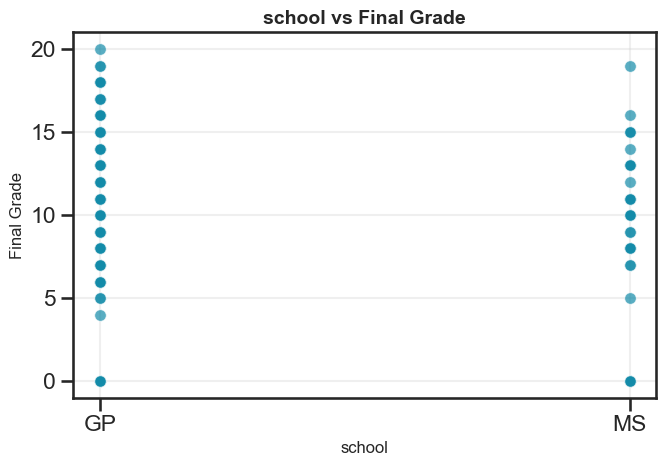

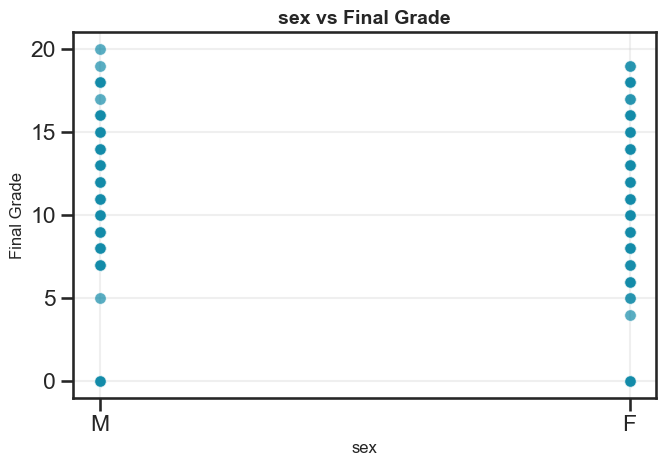

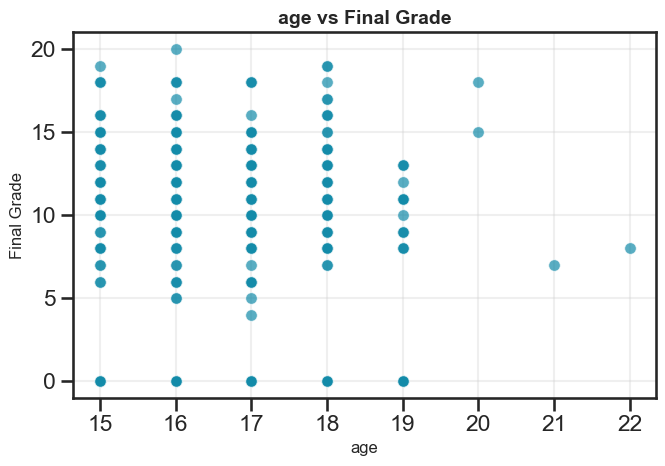

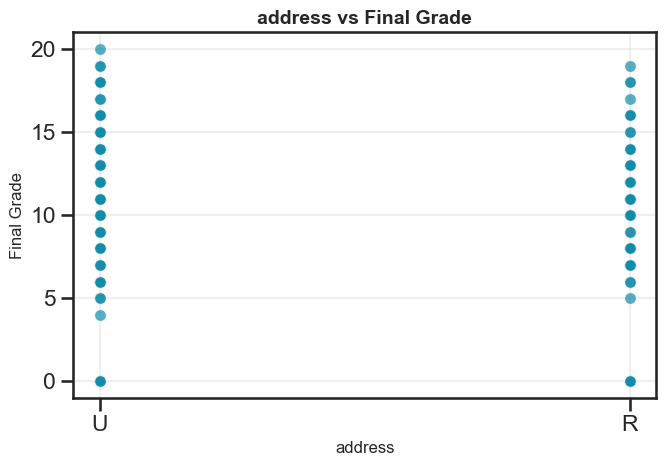

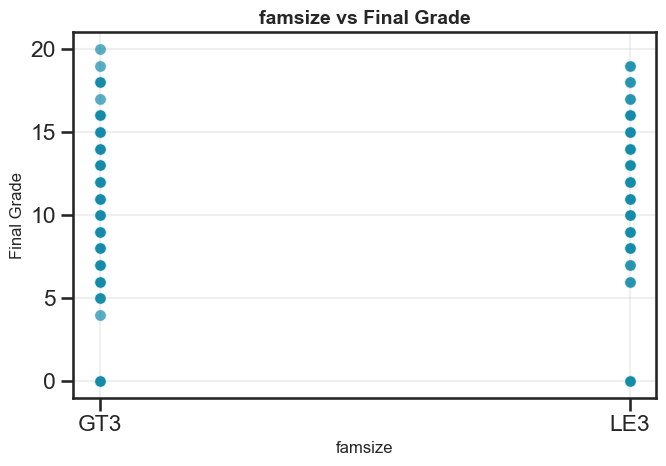

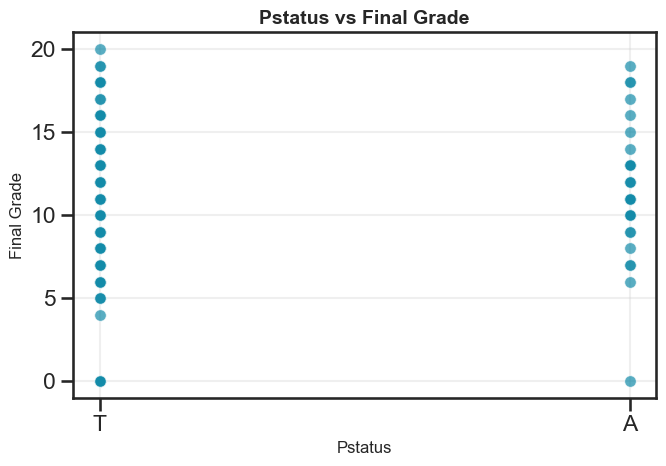

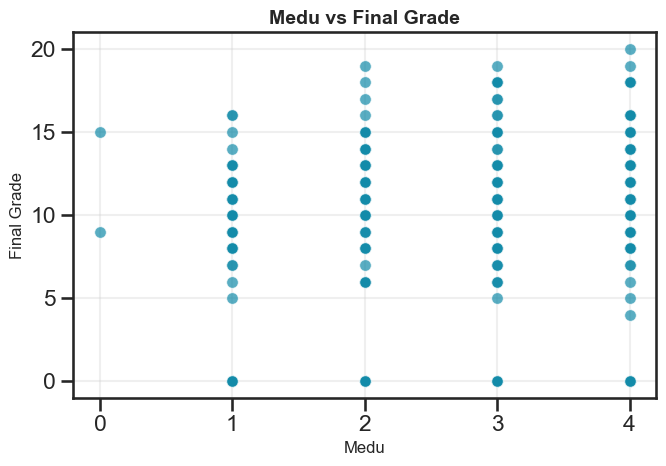

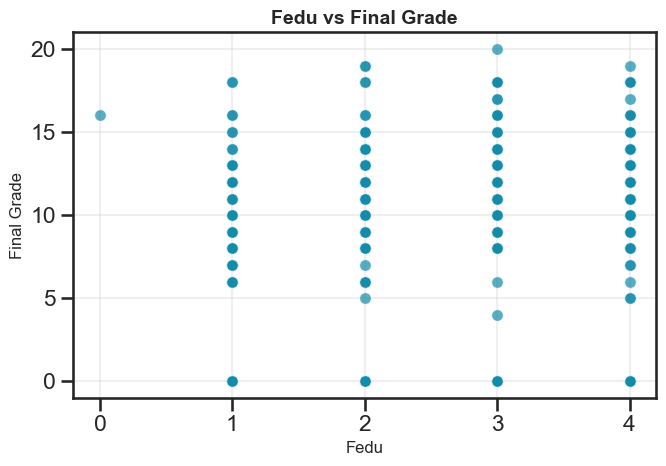

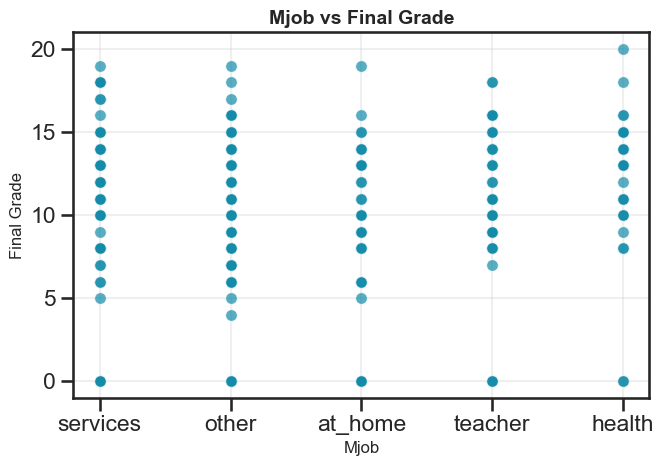

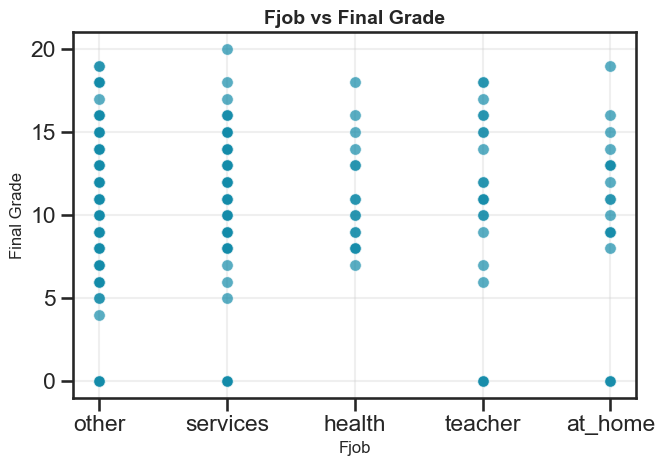

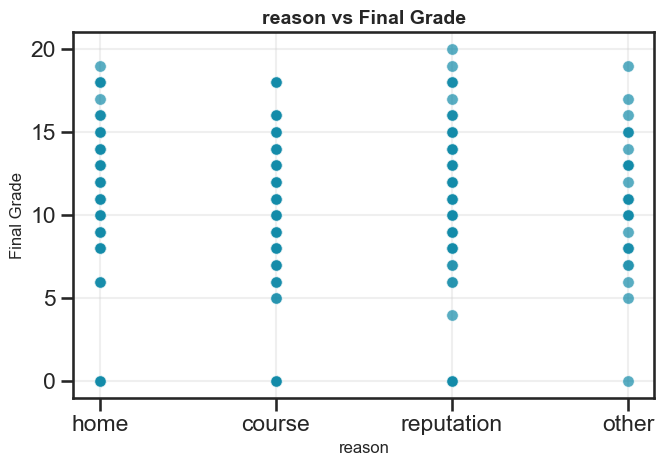

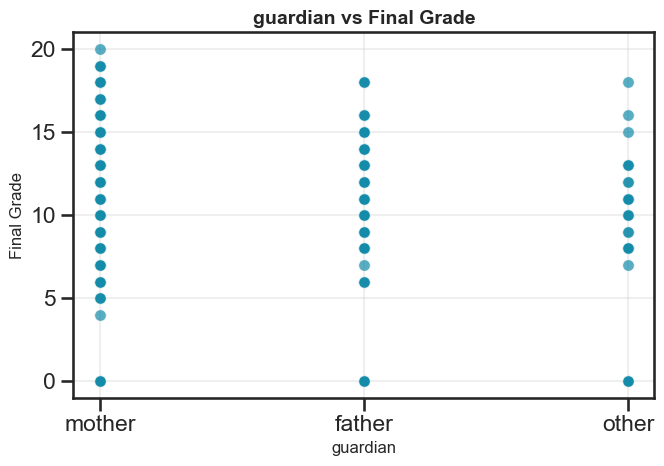

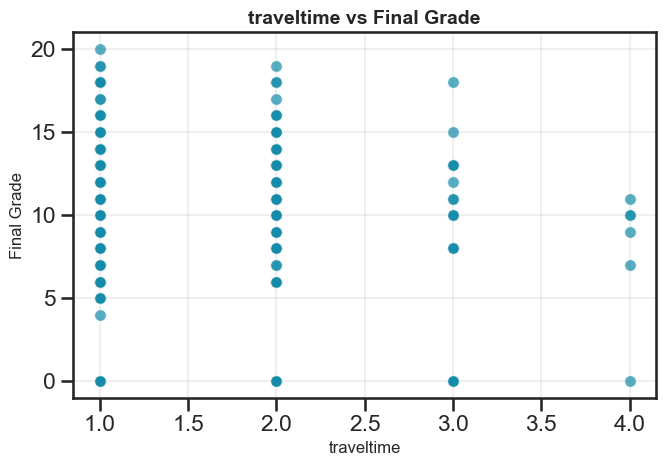

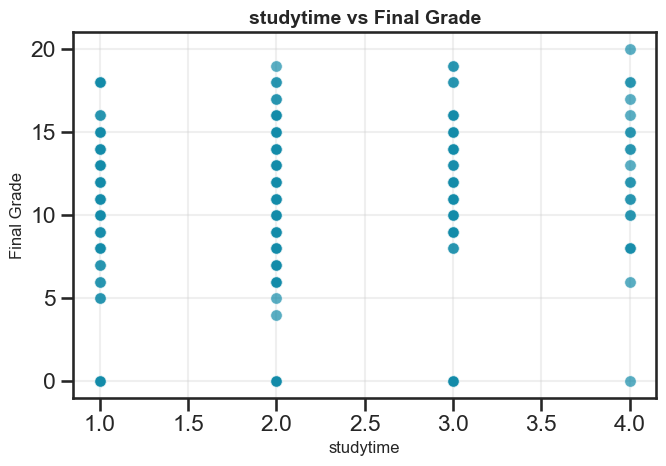

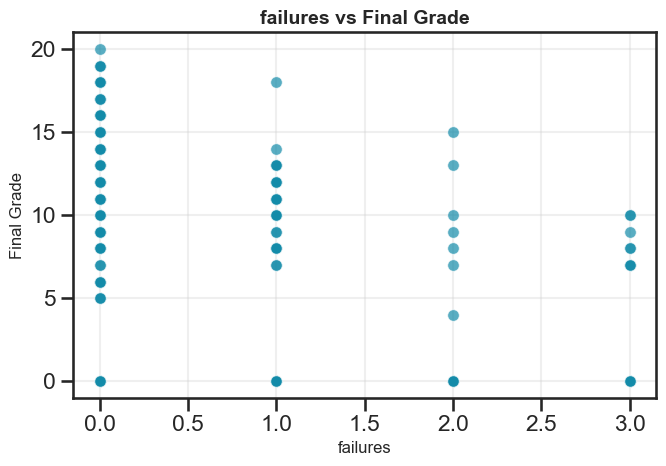

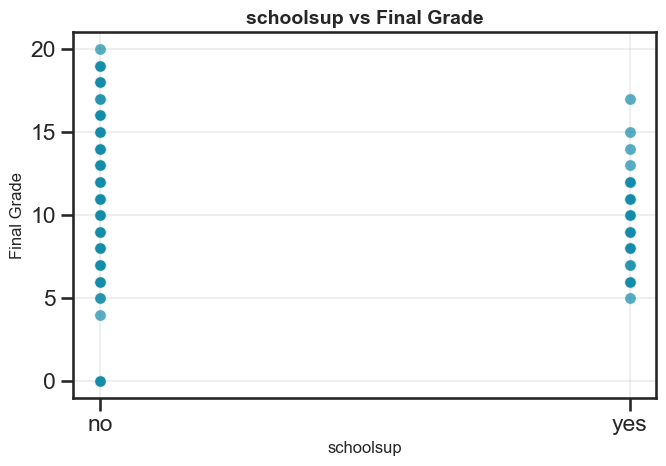

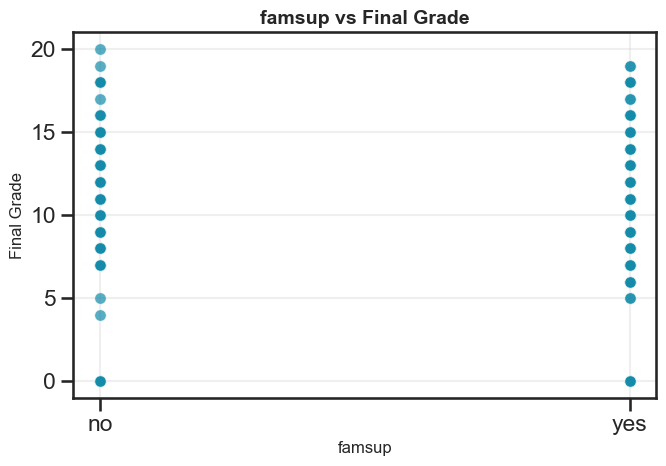

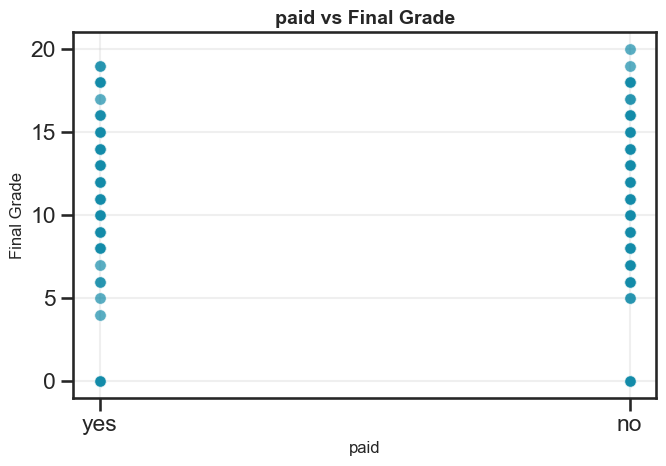

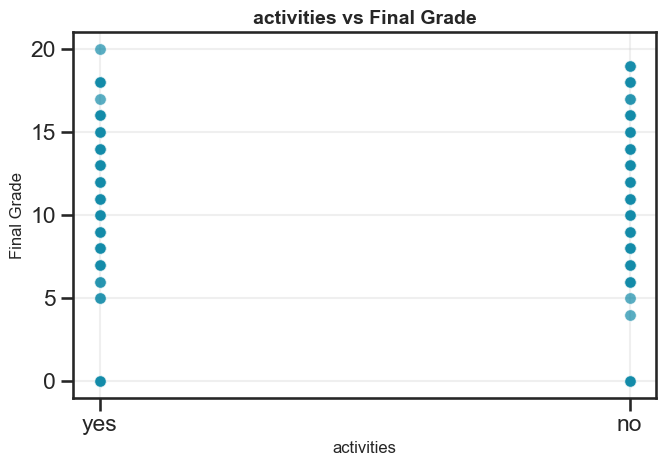

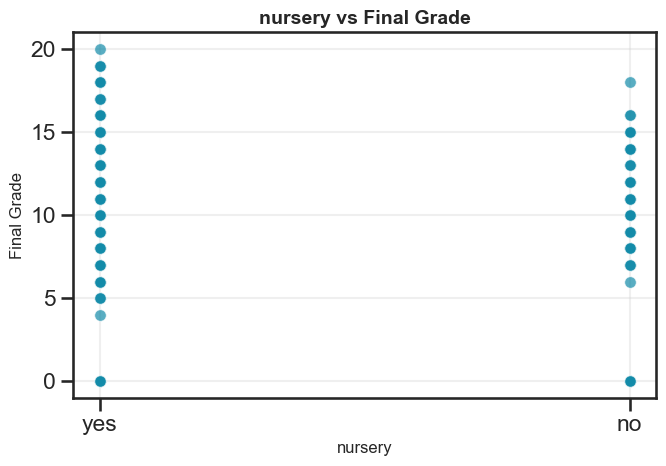

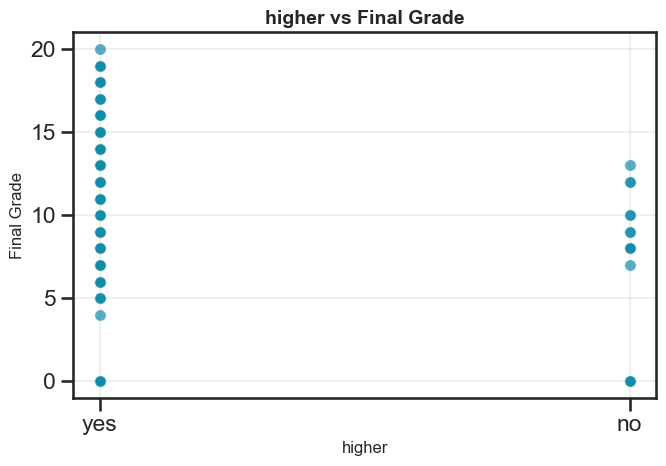

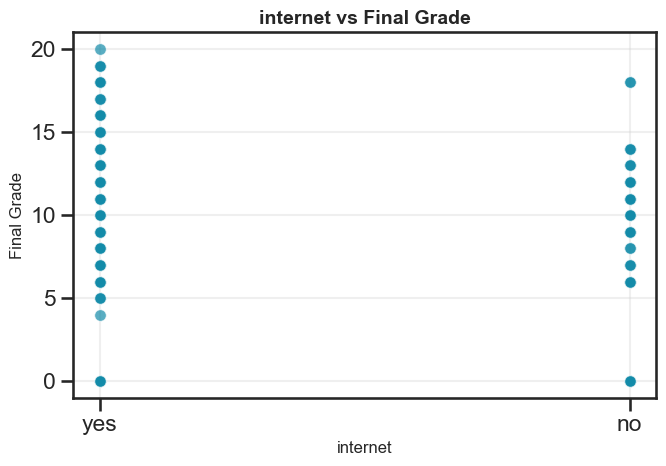

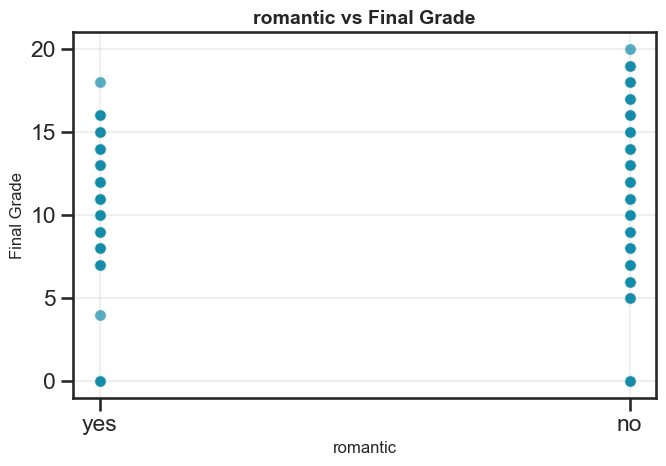

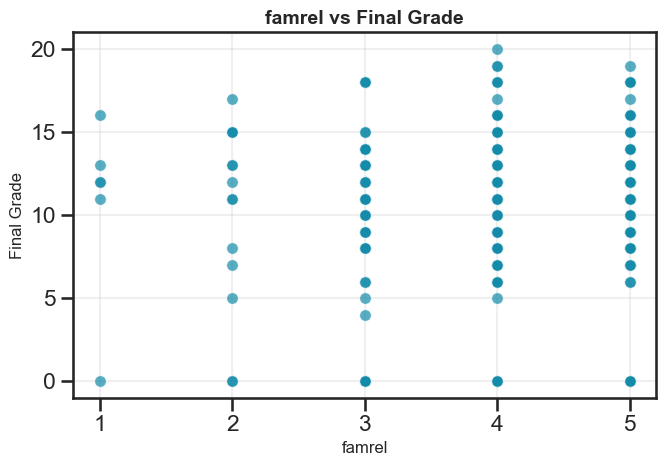

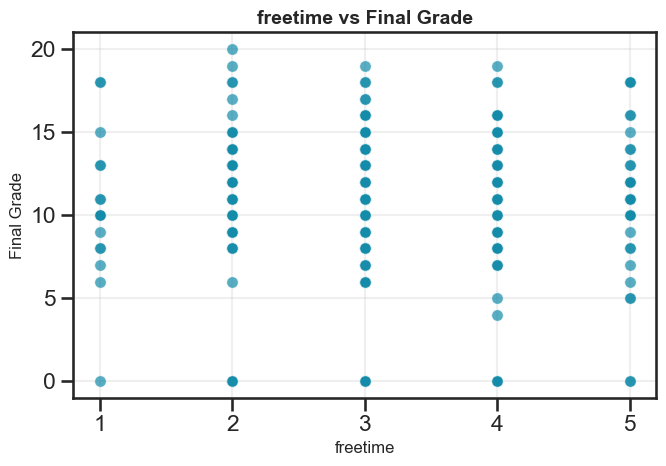

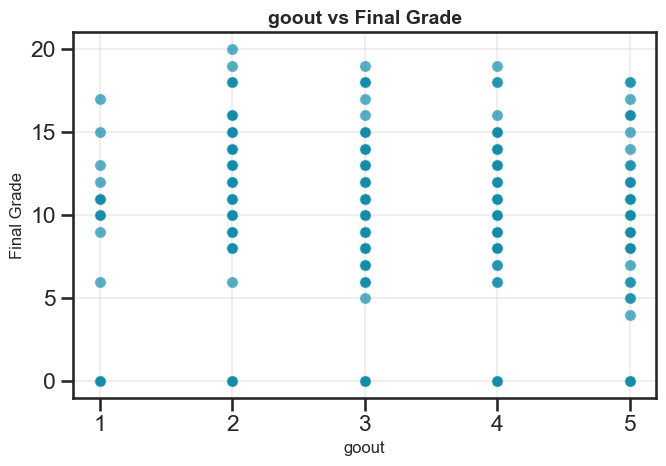

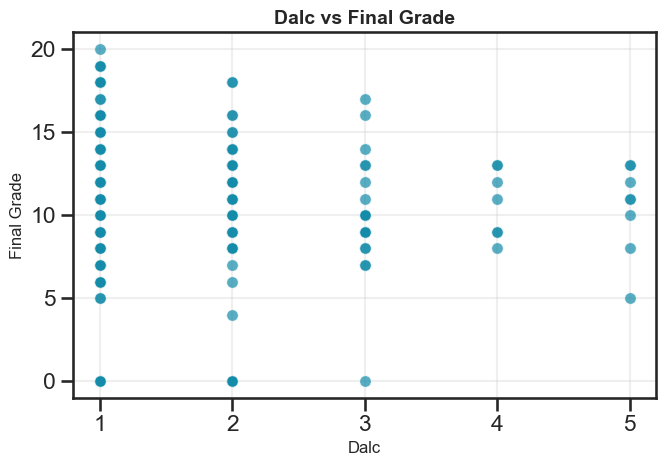

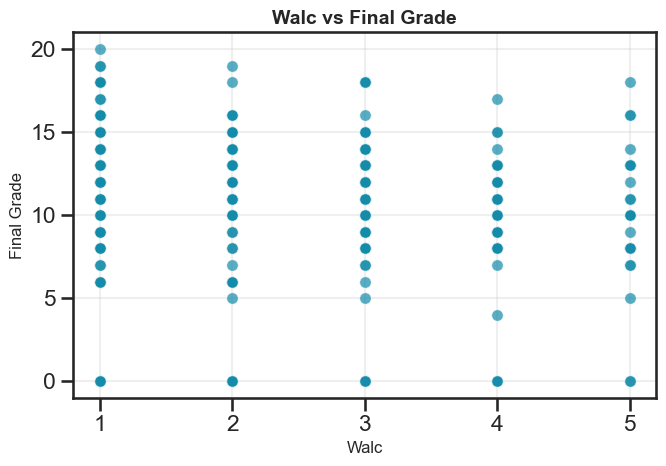

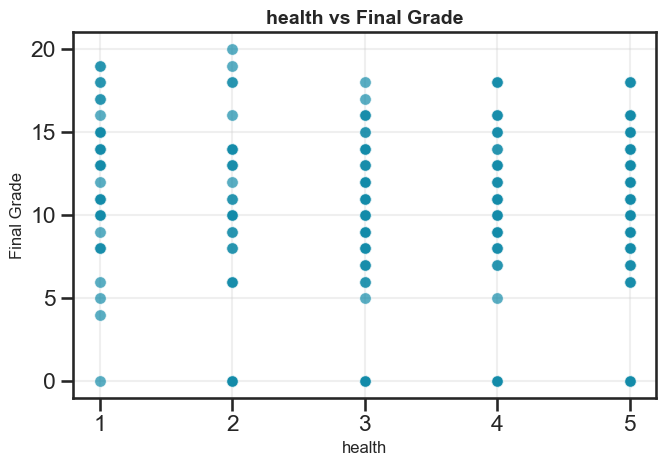

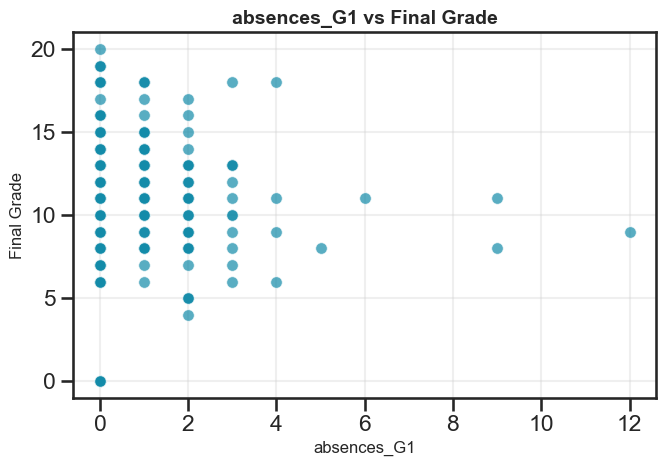

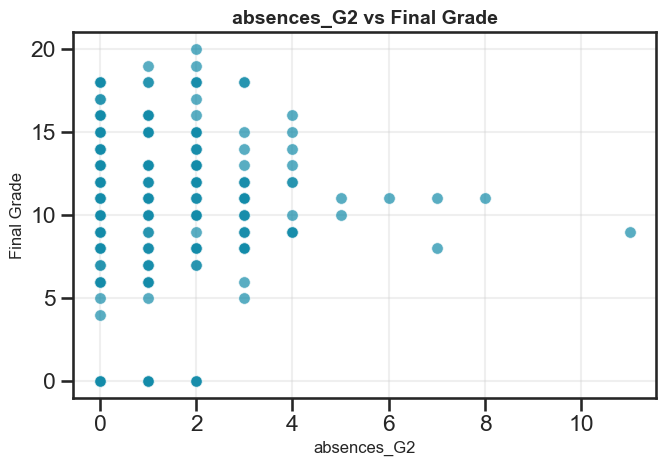

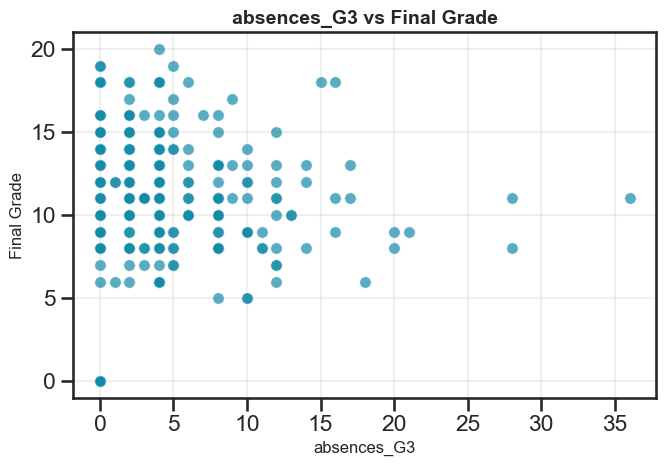

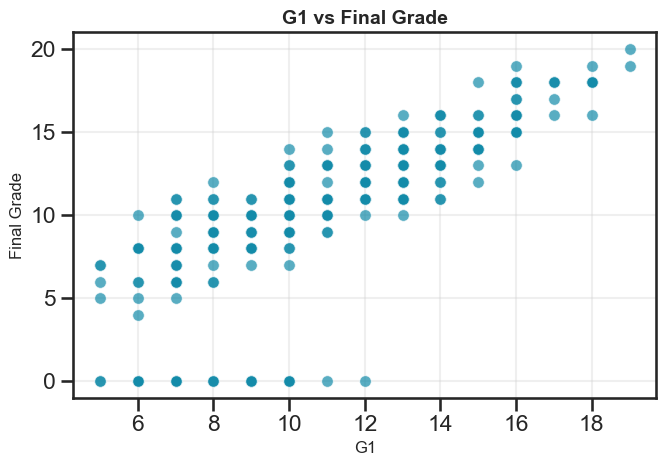

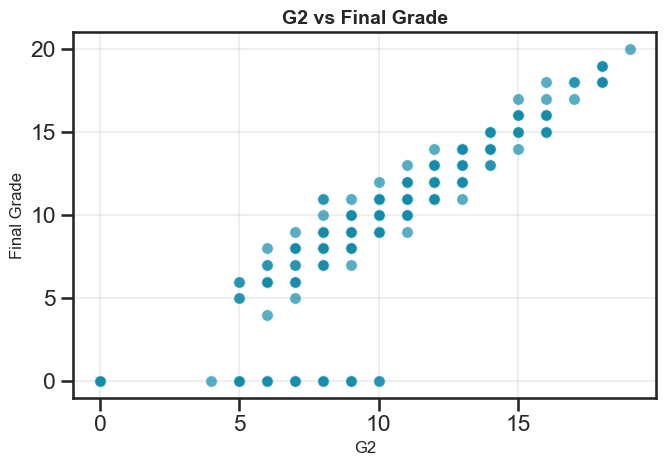

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style
sns.set_style("ticks")  # options: "white", "darkgrid", "ticks"
sns.set_context("talk")     # makes labels and ticks more readable

for feat in X_train.columns:
    plt.figure(figsize=(7, 5))


    # plt.plot(X_train[feat], y_train, 'o') # X_train is a DataFrame so we need a 1D array for X
    # plot with seaborn
    sns.scatterplot(
        x=X_train[feat],
        y=y_train,
        color="#138ba9", # custom blue, or pick from sns.color_palette()
        alpha=0.7, # so overlapping points are visible
        edgecolor="white",
        s=70 # point size
    )

    # labels
    plt.xlabel(feat, fontsize=12)
    plt.ylabel("Final Grade", fontsize=12)
    plt.title(f"{feat} vs Final Grade", weight="bold", fontsize=14)

    # layout
    plt.grid(alpha=0.3) # alpha makes the grid more opaque
    plt.tight_layout()

    # save each figure
    file_name = f"figures/{feat}_vs_final_grade.png"
    plt.savefig(file_name)

    plt.show()

## Prepare the Data

### Feature Selection
Based on the data exploration, we need to consider which features to include in the machine learning models. Limiting the data can be beneficial because it reduces complexity and can improve model performance by focusing on the most relevant features.

In [39]:
numeric_columns = ['absences_G1', 'absences_G2', 'absences_G3', 'G1', 'G2']
categorical_columns = ['internet', 'higher']
ordinal_columns = ['famrel']

### Custom Transformer
We want to create a new column that sums the three absences columns together as a new feature. Additionally, we want to  conditionally keep or drop the grades for the first and second terms based on the parameters passed.

G3 is the final year grade and is highly correlated with G2 and G1, which are grades from the first two terms. Predicting G3 without using G2 and G1 is more challenging but also more valuable since you could make predictions earlier in the year. Therefore, later we will create separate models (one that includes the G1 and G2 columns and one that excludes them) to test this.

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class StudentPerformanceCustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, drop_grades):
        self.drop_grades = drop_grades
    
    def fit(self, X, y=None): # pipelines require the fit() method to have two arguments X and y; which is why we have y=None
        return self  # nothing else to do
    
    def transform(self, df):
        # sum the absence columns into one
        df['absences_sum'] = df[['absences_G1', 'absences_G2', 'absences_G3']].sum(axis=1)
        # drop the absence columns for each term
        df = df.drop(columns=['absences_G1', 'absences_G2', 'absences_G3'])
        
        if self.drop_grades:
            df = df.drop(columns=['G1', 'G2'])
        return df

### Data Pipelines
Creating data pipelines allows us to automate the data cleaning process, and makes it easier to apply the same transformations to new data.

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

### numeric pipelines
# with G1/G2 columns
numeric_pipeline_with_grades = make_pipeline(
    SimpleImputer().set_output(transform="pandas"),
    StudentPerformanceCustomTransformer(drop_grades=False),
    StandardScaler()
)

# without G1/G2 columns
numeric_pipeline_without_grades = make_pipeline(
    SimpleImputer().set_output(transform="pandas"),
    StudentPerformanceCustomTransformer(drop_grades=True),
    StandardScaler()
)

### categorical pipeline
categorical_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(drop='first')
)

### ordinal pipeline
ordinal_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder()
)

### Column Transformers
Using column transformers with custom pipelines in machine learning allows us to handle datasets with different types of features.

In [42]:
### column transformers
# create the full pipeline (with grades)
column_transformer_with_grades = ColumnTransformer([
    ("numerical", numeric_pipeline_with_grades, numeric_columns),
    ("categorical", categorical_pipeline, categorical_columns),
    ("ordinal", ordinal_pipeline, ordinal_columns)
])

# create the full pipeline (without grades)
column_transformer_without_grades = ColumnTransformer([
    ("numerical", numeric_pipeline_without_grades, numeric_columns),
    ("categorical", categorical_pipeline, categorical_columns),
    ("ordinal", ordinal_pipeline, ordinal_columns) 
])

X_train_transformed_with_grades = column_transformer_with_grades.fit_transform(X_train)
# X_train_transformed_with_grades.shape # (316, 6)

X_train_transformed_without_grades = column_transformer_without_grades.fit_transform(X_train)
# X_train_transformed_without_grades.shape # (316, 4)

## Regression Models
This section fits and compares three regression models to the transformed data, both with and without the G1/G2 columns, using cross-validation and then compares RMSE scores.

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

### initialize models
lin_reg = LinearRegression() 

svm_reg = SVR(kernel="poly", degree=2)

lasso_reg = Lasso(alpha=0.1)

### cross validation scores
# lin_reg
cv_scores_lin_reg_with_grades = -cross_val_score(lin_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_root_mean_squared_error")
cv_scores_lin_reg_without_grades = -cross_val_score(lin_reg, X_train_transformed_without_grades, y_train, cv=3, scoring="neg_root_mean_squared_error")

# svm
cv_scores_svm_with_grades = -cross_val_score(svm_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_root_mean_squared_error")
cv_scores_svm_without_grades = -cross_val_score(svm_reg, X_train_transformed_without_grades, y_train, cv=3, scoring="neg_root_mean_squared_error")

# lasso
cv_scores_lasso_with_grades = -cross_val_score(lasso_reg, X_train_transformed_with_grades, y_train, cv=3, scoring="neg_root_mean_squared_error")
cv_scores_lasso_without_grades = -cross_val_score(lasso_reg, X_train_transformed_without_grades, y_train, cv=3, scoring="neg_root_mean_squared_error")

### mean rmse scores
print(f"RMSE Scores:")
print(f"------------")
# lin_reg
rmse_lin_reg_with_grades = np.mean(cv_scores_lin_reg_with_grades)
print(f"rmse_lin_reg_with_grades: {rmse_lin_reg_with_grades}")

rmse_lin_reg_without_grades = np.mean(cv_scores_lin_reg_without_grades)
print(f"rmse_lin_reg_without_grades: {rmse_lin_reg_without_grades}")

# svm
rmse_svm_with_grades = np.mean(cv_scores_svm_with_grades)
print(f"rmse_svm_with_grades: {rmse_svm_with_grades}")

rmse_svm_without_grades = np.mean(cv_scores_svm_without_grades)
print(f"rmse_svm_without_grades: {rmse_svm_without_grades}")

# lasso
rmse_lasso_with_grades = np.mean(cv_scores_svm_with_grades)
print(f"rmse_lasso_with_grades: {rmse_svm_with_grades}")

rmse_lasso_without_grades = np.mean(cv_scores_lasso_without_grades)
print(f"rmse_lasso_without_grades: {rmse_lasso_without_grades}")


RMSE Scores:
------------
rmse_lin_reg_with_grades: 1.8748791728883922
rmse_lin_reg_without_grades: 4.497065931519388
rmse_svm_with_grades: 2.23991975887249
rmse_svm_without_grades: 4.547615167036173
rmse_lasso_with_grades: 2.23991975887249
rmse_lasso_without_grades: 4.531065553645256


## Fine-Tune the System
This section explores using the Support Vector Machine (SVM) regression model and performing grid search to fine-tune its hyperparameters.

In [44]:
from sklearn.model_selection import GridSearchCV

# define param grid
param_grid = {
    "C": [1, 10, 100], # how much penalty to apply for wrong predictions
    "epsilon": [0.1, 0.5, 1.0], # higher epsilon means larger street size
}

# initialize a grid search
grid_search = GridSearchCV(svm_reg, param_grid, cv=3, verbose=1)
# grid_search_without_grades = GridSearchCV(svm_reg, param_grid, cv=3, verbose=1)

# fit the grid search
svm_model_with_grades = grid_search.fit(X_train_transformed_with_grades, y_train)
svm_model_without_grades = grid_search.fit(X_train_transformed_without_grades, y_train)

# best params
print("Best Parameters: ")
print(f"----------------")
best_params_with_grades = svm_model_with_grades.best_params_
best_params_without_grades = svm_model_without_grades.best_params_ 
print(f"best_params_with_grades: {best_params_with_grades}")
print(f"best_params_without_grades: {best_params_without_grades}")

# best scores
print("")
print("Best Scores: ")
print(f"------------")
print(f"svm_model_with_grades best_score: {svm_model_with_grades.best_score_}")
print(f"svm_model_without_grades best_score: {svm_model_without_grades.best_score_}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: 
----------------
best_params_with_grades: {'C': 10, 'epsilon': 0.1}
best_params_without_grades: {'C': 10, 'epsilon': 0.1}

Best Scores: 
------------
svm_model_with_grades best_score: 0.018228194253428514
svm_model_without_grades best_score: 0.018228194253428514


## Measuring Performance on the Test Set
This section transforms the test set using the full pipeline and measures the performance of the best model on the test set.

In [45]:
from sklearn.metrics import root_mean_squared_error, r2_score

### fit best model
model_with_grades = LinearRegression()
model_with_grades.fit(X_train_transformed_with_grades, y_train)

model_without_grades = LinearRegression()
model_without_grades.fit(X_train_transformed_without_grades, y_train)

### transform the test set
X_test_transformed_with_grades = column_transformer_with_grades.transform(X_test) 
X_test_transformed_without_grades = column_transformer_without_grades.transform(X_test)

### evaluate performance
print("Results for Linear Regression with grades: ")
print(f"------------------------------------------")
final_with_predictions = model_with_grades.predict(X_test_transformed_with_grades)
rmse_with_grades = root_mean_squared_error(y_test, final_with_predictions)
print(f"rmse with grades: {rmse_with_grades}")

r2_with_grades = r2_score(y_test, final_with_predictions)
print(f"r2 with grades: {r2_with_grades}")

print("")
print("Results for Linear Regression without grades: ")
print(f"---------------------------------------------")
final_without_predictions = model_without_grades.predict(X_test_transformed_without_grades)
rmse_without_grades = root_mean_squared_error(y_test, final_without_predictions)
print(f"rmse without grades: {rmse_without_grades}")

r2_without_grades = r2_score(y_test, final_without_predictions)
print(f"r2 without grades: {r2_without_grades}")



Results for Linear Regression with grades: 
------------------------------------------
rmse with grades: 2.0631589874478093
r2 with grades: 0.792410865879065

Results for Linear Regression without grades: 
---------------------------------------------
rmse without grades: 4.663400141615016
r2 without grades: -0.06058282122000214


## Conclusion & Next Steps
The Linear Regression model with grades is the best predictor of the student's performance based on the set of regression models tested. The next steps based on the analysis would be to continue finetuning the regressions, and implement a DecisionTree model if the regressions do not show improvements in RMSE and R^2 scores.
